# M.L.  PROJECT: AIRLINE PASSENGER SATISFACTION

## The goal of this project is to build a binary classification model to predict passenger satisfaction (Satisfied vs. Neutral or Dissatisfied) based on the given features.

in particular the features are:

DEMOGRAPHICS

Gender: Categorical feature with values Male or Female.
Age: Continuous numerical feature representing the passenger's age in years.

TRAVEL DETAILS

Customer Type: First-time customer or Returning customer.
Indicates whether the passenger is flying for the first time with the airline or has flown before.

Type of Travel: Categorical feature with values Business or Personal.
Describes the purpose of the trip (e.g., work-related or leisure).

Class: Categorical feature with values Economy, Business, or First class.
Represents the seating class of the passenger.

Flight Distance: Continuous numerical feature representing the distance of the flight in kilometers.
Indicates the total travel distance for a passenger’s flight. No scaling is applied; the values represent actual distances.


SERVICE RATINGS (Scale: 1–5)
These features are ordinal categorical variables designed to capture the subjective experiences of passengers, where:

1 = Poor experience
5 = Excellent experience

Departure and Arrival Time Convenience: Rating of how convenient the flight schedule was for the passenger.

Ease of Online Booking: Rating of the passenger's experience with booking the flight online.

Check-in Service: Rating of the service quality during the check-in process at the airport.

Online Boarding: Rating of the experience using online boarding services (e.g., e-boarding passes).

Gate Location: Rating of the convenience of the gate's location in the airport.

On-board Service: Rating of the quality of service received during the flight.

Seat Comfort: Rating of the comfort level of the seats.

Leg Room Service: Rating of the amount of legroom available during the flight.

Cleanliness: Rating of the cleanliness of the flight (e.g., cabin, restrooms).

Food and Drink: Rating of the quality of food and beverages served during the flight.

In-flight Service: Rating of the overall service quality provided by the flight crew.

In-flight Wifi Service: Rating of the quality of the WiFi service during the flight.

In-flight Entertainment: Rating of the quality of entertainment options (e.g., movies, music).

Baggage Handling: Rating of the efficiency and care with which baggage was handled by the airline.

DELAYS

Departure Delay (minutes): Continuous numerical feature representing the delay (in minutes) of the flight’s departure.
Zero indicates no delay; higher values reflect longer delays.

Arrival Delay (minutes): Continuous numerical feature representing the delay (in minutes) of the flight’s arrival.
Zero indicates no delay; higher values reflect longer delays.


TARGET VARIABLE

Satisfaction: Categorical variable indicating the overall satisfaction of the passenger with their flight experience.
Values:   Satisfied (1) - Neutral or Dissatisfied (0)
This is the variable the binary classification model aims to predict.


# Visualization of data and first considerations

import all the classes, the necessary libraries are implemented thanks to the init notebook, where there are the requirements

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.plotting import plot_decision_regions


from scipy.stats import loguniform, beta, uniform

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline

import missingno as msno

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# method to use all the gpu of the pc
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-02-14 13:27:47.453310: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 13:27:47.461817: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 13:27:47.495866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-14 13:27:47.495945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-14 13:27:47.496836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

visualization of tabular data

In [2]:
AIR_data = pd.read_csv('/work/airline_passenger_satisfaction.csv')
AIR_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


Our dataset is big, 129880 rows x 24 columns. Let's see if there are missing values:

In [3]:
AIR_data.isnull().sum(axis=0)/AIR_data.shape[0]

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.003026
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [4]:
AIR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

We can see that, fortunately, there are few missing data. In addition, there are datas of type: int, float and object (categorical)

# Feature preprocessing

In this part of the workflow we are going to handle missing data and define a pipeline for handling and simplifying the data

In [5]:
AIR_data['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [6]:
# drop ID inplace
AIR_data.drop('ID', axis=1, inplace=True)
AIR_data

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [7]:
# map gender to 0 and 1
AIR_data['Gender'] = AIR_data['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
AIR_data['Satisfaction'].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

the target is slightly unbalanced towards the 0 class, so neutral or dissatisfied

In [9]:
X = AIR_data.drop(columns=['Satisfaction'])  
y = AIR_data['Satisfaction']               

# map in 0 e 1
y = y.map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

For the definition of the pipeline, I preferred to divide the numerical feature that are continuous from the others that are in the order 0 - 5, because I want to treat them with MinMaxScaler, in order to keep the order

In [10]:
# Identification of numerical and categorical features
minmax_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 
    'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 
    'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 
    'Baggage Handling'
]

other_numerical_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
categorical_columns = ['Customer Type', 'Type of Travel', 'Class']

In [11]:
# Pipeline for MinMaxScaler
minmax_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # for safety if there are missing values not seen 
    ('scaler', MinMaxScaler())                   
])

# Pipeline for Standardization
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # for safety if there are missing values not seen 
    ('scaler', StandardScaler())                 
])

# Pipeline for One-Hot Encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # for safety if there are missing values not seen 
    ('encoder', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))  
])

In [12]:
final_transformation = ColumnTransformer([
    ('minmax', minmax_pipeline, minmax_columns),
    ('num', numerical_pipeline, other_numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

# Initial feature selection

In the following section there is the part that explains the workflow for the selection of the most important columns, in order to reduce the dimensionality of the dataset, that, if complete, would require a lot of time for the evaluation of the best models. In particular we want to reduce columns without losing informations.

The strategy is based on:

1) division of the dataset into a raw version of train and test set.  see code below

In [13]:
# Split of raw data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y, shuffle=True)

2) transformation of the data

In [14]:
X_train_processed = final_transformation.fit_transform(X_train_raw)

feature_names = final_transformation.get_feature_names_out()

3) Selection of the best columns by applying a solid Random Forest classifier ONLY ON THE TRAIN SET, in order to prevent data lickage. In particular the threshold selected for the importance is 0.02

In [15]:

model = RandomForestClassifier(n_estimators=1000,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42)
model.fit(X_train_processed, y_train)

# Calculation of feature importance
importances = model.feature_importances_

# Feature selection (feature importance > 0.02)
selected_features = [name for name, importance in zip(feature_names, importances) if importance > 0.02]
print("Feature selezionate:", selected_features)

Feature selezionate: ['Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Age', 'Flight Distance', 'Customer Type_Returning', 'Type of Travel_Personal', 'Class_Economy']


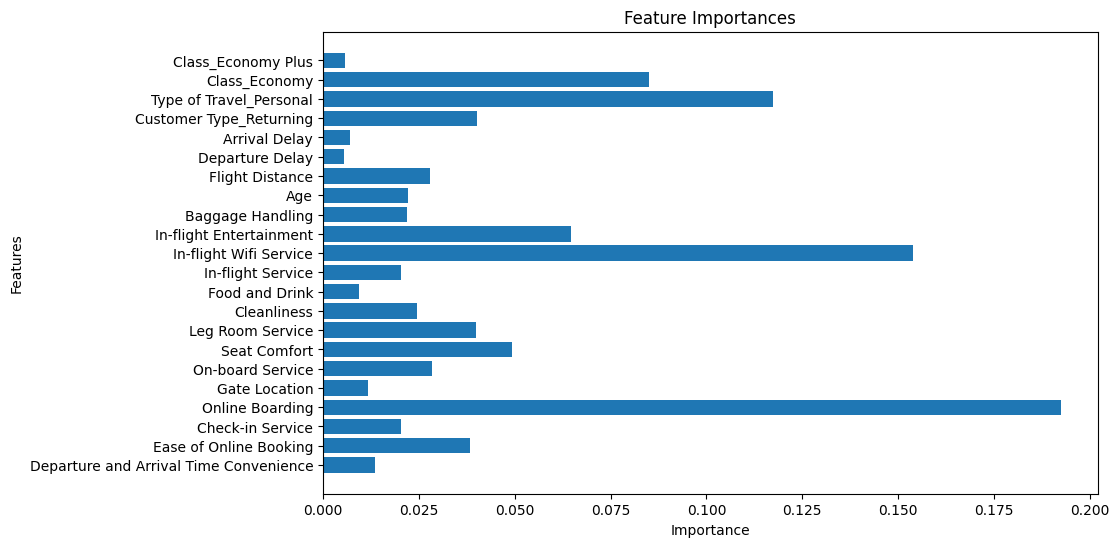

In [16]:
feature_names_list = list(feature_names)

# Visualization of the importance of features
plt.figure(figsize=(10, 6))
plt.barh(feature_names_list, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



4) Since we have applied OneHotEncoder and we want to get the "new" dataset without some columns we have to "bring back" the new columns created by OneHotEncoder into the original one. The process is done as follows: 

In [17]:

def map_features_to_columns(selected_features, feature_names, original_columns):
    mapped_columns = []
    for feature in selected_features:
        if feature in original_columns:  
            mapped_columns.append(feature)
        else:  # Columned transformed with onehotencoder
            for col in original_columns:
                if col in feature:
                    mapped_columns.append(col)
                    break
    return list(set(mapped_columns))

original_columns = minmax_columns + other_numerical_columns + categorical_columns
selected_columns = map_features_to_columns(selected_features, feature_names, original_columns)
print("Original selected columns:", selected_columns)


Original selected columns: ['Online Boarding', 'Seat Comfort', 'Leg Room Service', 'In-flight Service', 'Baggage Handling', 'Customer Type', 'In-flight Wifi Service', 'Type of Travel', 'Ease of Online Booking', 'On-board Service', 'Cleanliness', 'In-flight Entertainment', 'Flight Distance', 'Check-in Service', 'Class', 'Age']


we can see that there are 5 columns that aren't so useful for our classification, that are: 

5) Rebuild the final train and test sets that are now reduced (made for visualization as main purpose)

In [18]:
# Get the new dataset
X_train_reduced = X_train_raw[selected_columns]
X_test_reduced = X_test_raw[selected_columns]

In [19]:
X_train_reduced

,Online Boarding,Seat Comfort,Leg Room Service,In-flight Service,Baggage Handling,Customer Type,In-flight Wifi Service,Type of Travel,Ease of Online Booking,On-board Service,Cleanliness,In-flight Entertainment,Flight Distance,Check-in Service,Class,Age
57644,2,5,4,4,4,Returning,4,Business,4,4,1,4,1848,3,Business,56
103332,4,5,3,1,1,Returning,3,Personal,3,1,4,1,1371,3,Economy,70
76605,4,5,5,5,5,Returning,3,Business,1,5,5,5,2473,5,Business,48
121595,3,5,4,2,2,Returning,3,Personal,3,4,5,5,912,2,Economy,63
107087,4,4,4,4,4,Returning,4,Business,4,4,3,4,562,3,Business,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,4,4,2,2,2,Returning,2,Business,5,2,1,2,3391,3,Business,48
115604,5,4,4,4,4,Returning,1,Business,1,4,4,4,446,4,Business,70
48449,2,2,5,5,1,Returning,2,Business,2,3,2,2,819,2,Economy,37
15398,3,2,3,3,4,First-time,3,Business,3,5,2,2,433,2,Economy,21


In [20]:
X_test_reduced

,Online Boarding,Seat Comfort,Leg Room Service,In-flight Service,Baggage Handling,Customer Type,In-flight Wifi Service,Type of Travel,Ease of Online Booking,On-board Service,Cleanliness,In-flight Entertainment,Flight Distance,Check-in Service,Class,Age
126481,3,3,4,4,3,Returning,3,Business,3,2,3,3,1849,3,Economy,57
12424,4,5,2,4,3,Returning,4,Personal,4,1,5,5,190,2,Economy,58
128951,5,4,4,5,4,First-time,5,Business,5,4,4,4,236,5,Business,40
2489,1,1,5,3,3,Returning,1,Business,5,3,1,1,1379,1,Business,30
44988,5,5,2,2,4,Returning,5,Business,3,3,5,5,359,3,Economy,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30437,2,3,2,2,2,Returning,2,Personal,2,2,3,3,851,1,Economy,66
113558,3,5,3,5,5,First-time,3,Business,3,5,5,5,197,3,Economy,24
45361,2,3,3,3,3,Returning,2,Personal,2,3,3,3,188,3,Economy,39
118685,1,3,1,4,4,First-time,1,Personal,1,3,3,3,325,2,Economy,14


# Definition of the model pipeline and reduction of rows

in this section of the workflow i defined the transformation of the remaining columns. But, since the train set is still big, I decided to select a subset of it (see below the implementation), in particular moving from 103904 rows to 70000.

In [21]:
# Columns with values between 0 and 5
minmax_columns = [
    'Baggage Handling', 'Ease of Online Booking', 'In-flight Wifi Service', 'Seat Comfort', 'Online Boarding', 'In-flight Service', 'On-board Service', 'In-flight Entertainment', 'Leg Room Service', 'Check-in Service', 'Cleanliness'
]

other_numerical_columns = ['Age', 'Flight Distance']
categorical_columns = ['Customer Type', 'Type of Travel', 'Class']

In [22]:
# define new pipelines now for the remaining columns
minmax_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler())                   
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())                 
])

# Pipeline for categorical data
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))  
])

In [23]:
final_transformation = ColumnTransformer([
    ('minmax', minmax_pipeline, minmax_columns),
    ('num', numerical_pipeline, other_numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

In [24]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [25]:
X_train_reduced = final_transformation.fit_transform(X_train_reduced)
X_test_reduced = final_transformation.transform(X_test_reduced)
model_pipeline = IMBPipeline([
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

Here there's the selection of the subset of 70000 rows with which we are going to train the model. In particular here a train test split is used linked to stratification in order to keep the randomness of possible selection. In the implementation there is _ as variable for the data that i'm no more using

In [26]:

subset_size = 70000  # Number of rows to keep

# test size
test_size = 1 - (subset_size / len(X_train_reduced))

# selection of the portion of the dataset
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_reduced, y_train, 
    test_size=test_size, 
    stratify=y_train,  
    random_state=42
)

# Model Selection

this part of the workflow is for the selection of the best model based on nested cross validation 

In [27]:
model_pipeline.fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [28]:
model_pipeline.predict(X_train_sampled)

array([0, 1, 1, ..., 1, 1, 1])

In [29]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__learning_rate': loguniform(0.01, 0.3),
        'classifier__n_estimators': [50, 100, 200,500],
        'classifier__max_depth': [3, 4, 6, 9],
        'classifier__random_state': [1],
    }
]

In [30]:
all_configs = [dict(itertools.chain(*(e.items() 
for e in configuration))) 
for configuration in 
itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

In [31]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

even if the dataset contains 70000 rows I decided to use cv = 5, in order to make it a little bit faster.

In [32]:
scores = cross_validate(rs, X_train_sampled, y_train_sampled, scoring='f1', cv = 5, return_estimator=True, verbose=3) # 2 hours and 25 minutes

[CV] END ......................................., score=0.952 total time=35.8min
[CV] END ......................................., score=0.954 total time=33.5min
[CV] END ......................................., score=0.951 total time=32.3min
[CV] END ......................................., score=0.952 total time=31.3min
[CV] END ......................................., score=0.956 total time=31.7min


In [33]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

RandomOverSampler(sampling_strategy=0.9)
None
RandomForestClassifier(n_estimators=500) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.9519825999665384
----------
RandomOverSampler(sampling_strategy='minority')
None
RandomForestClassifier(n_estimators=500) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state'

I trained the models over the train set containing 70000 rows, then I decided to test it on the whole initial train set, before the reduction from 103904 to 70000, and on the test set. It is possible to see that the selection of 70000 rows didn't discarded important informations, since f1 is really high on both train and test sets.

In [34]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train_sampled, y_train_sampled)
    pred_train = estimator.best_estimator_.predict(X_train_reduced)
    pred_test = estimator.best_estimator_.predict(X_test_reduced)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.9857320927747852, F1 on test set:0.954666186467384
F1 on training set:0.9857064993715309, F1 on test set:0.9546599496221663
F1 on training set:0.9858079453244136, F1 on test set:0.9545290833783541
F1 on training set:0.9858500011124213, F1 on test set:0.9548091191150682
F1 on training set:0.985809208988614, F1 on test set:0.9554725136193778


In addition we can say that the model is able to adapt well on the unseen data, thanks also to the fact that we have only columns that are actually important for the evaluation

# Refinement of the selected model

We can immediately see that the best model is RandomForestClassifier, in all 5 cases. So we simply have to see how the performance changes with respect to the size of the data

In [35]:
# the best is random forest 
best_model_pipeline = IMBPipeline([
    ('classifier', RandomForestClassifier())  
])

In [36]:
# definition of the parameters that will be used in the randomized search for random forest
params = {
    'classifier__n_estimators': [10, 50, 100, 500],  
    'classifier__max_depth': [None, 10, 20, 30],  
    'classifier__max_features': ['sqrt', 'log2'],  
}

In [37]:
rs_best = RandomizedSearchCV(
    estimator=best_model_pipeline,
    param_distributions=params,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1',  
    n_jobs=-1  
)

In [38]:
rs_best.fit(X_train_sampled, y_train_sampled)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('classifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__n_estimators': [10, 50,
                                                                     100,
                                                                     500]},
                   scoring='f1')

In [39]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test_reduced))

0.9551322560259998

In [40]:
cls = rs_best.best_estimator_

# Visualization of the results

we are now going to see the results of the performance of the model in terms of confusion matrix, decision boundary and validation curve

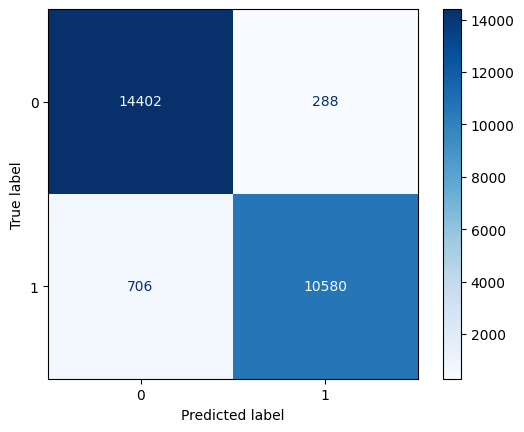

array([[14402,   288],
       [  706, 10580]])

In [41]:
# visualization of the confusion matrix
conf_matrix = confusion_matrix(y_test, cls.predict(X_test_reduced))


conf_matrix = confusion_matrix(y_test, cls.predict(X_test_reduced))
ConfusionMatrixDisplay.from_predictions(y_test, cls.predict(X_test_reduced), cmap=plt.cm.Blues)
plt.show()
conf_matrix

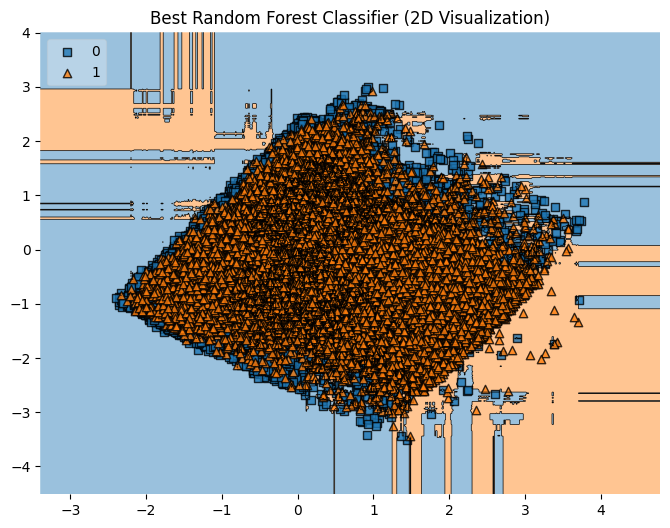

In [43]:


# Reduce the dataset to two features for visualization purposes
pca = PCA(n_components=2)
X_train_sampled_2d = pca.fit_transform(X_train_sampled)

# Fit the classifier again to the reduced dataset
cls.fit(X_train_sampled_2d, y_train_sampled)

# Create the graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Best Random Forest Classifier (2D Visualization)")

# Visualization of decision boundaries
plot_decision_regions(X=X_train_sampled_2d, y=np.array(y_train_sampled), clf=cls, legend=2, ax=ax)

plt.show()

validation curve

In [45]:
train_sizes, train_scores, test_scores = learning_curve(
    cls,
    X=X_train_reduced,
    y=y_train,
    train_sizes=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    cv=5,
    n_jobs=-1,
    scoring='f1',
    shuffle=False
)

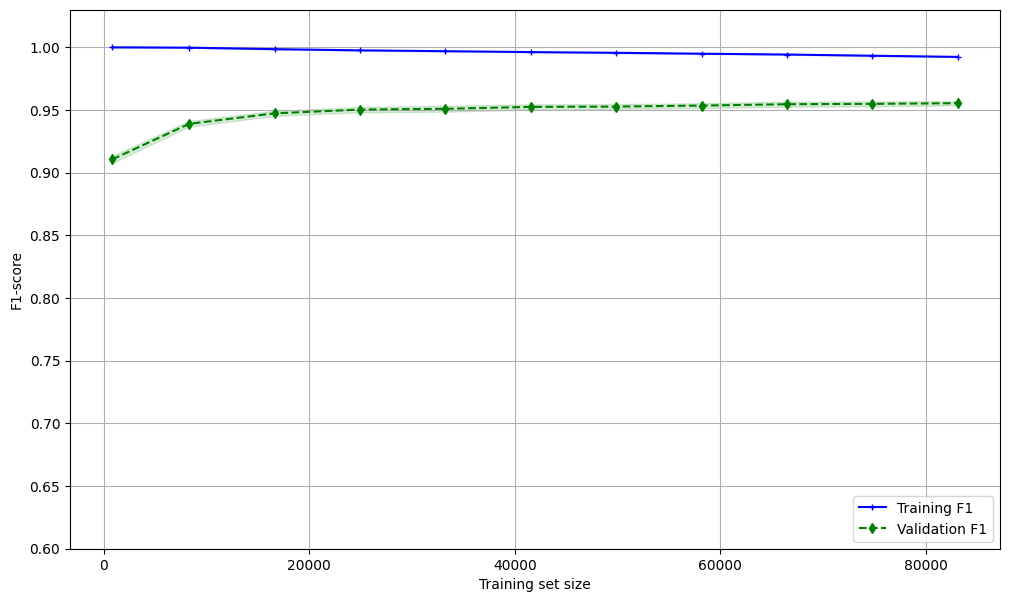

In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Creation of the graph of the learning curve
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

# Draw the curve for the training set
ax.plot(train_sizes, train_mean, color='blue', marker='+', markersize=5, label='Training F1')
ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# Draw the curve for the validation set
ax.plot(train_sizes, test_mean, color='green', linestyle='--', marker='d', markersize=5, label='Validation F1')
ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Details of the graph
ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])  # F1 scores oon the y axis
plt.show()

The lines of the training and validation curve tend to converge if we increase the size of the dataset, that is really good, since it means that we are reducing overfitting and the model is not completely adapted to the train data

This also allow to make a conclusion, that is, the data are actually good and not noisy for this type of classification.

# Model with non subjective data

we have seen that our model is actually really good in identifying the satisfaction or not of our passengers,  but several features are based on subjective comments. So, in this section, i want to analyze if subjectivity of evaluations hardly affects the classification.

In order to do so we have to remove all the columns that are based on customers ratings

I decided to reload the dataset in order to be able to run, if we want, this part without running all the notebook

In [47]:
AIR_data = pd.read_csv('/work/airline_passenger_satisfaction.csv')
AIR_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


# Erase subjective columns

In [48]:
AIR_data.drop([
    'On-board Service', 'In-flight Service', 'Cleanliness', 'Seat Comfort',
    'Leg Room Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling',
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'ID', 'Departure and Arrival Time Convenience',
    'Gate Location', 'Food and Drink'
], axis=1, inplace=True)

In [49]:
# map gender to 0 and 1
AIR_data['Gender'] = AIR_data['Gender'].map({'Male': 0, 'Female': 1})

In [50]:
AIR_data

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Satisfaction
0,0,48,First-time,Business,Business,821,2,5.0,Neutral or Dissatisfied
1,1,35,Returning,Business,Business,821,26,39.0,Satisfied
2,0,41,Returning,Business,Business,853,0,0.0,Satisfied
3,0,50,Returning,Business,Business,1905,0,0.0,Satisfied
4,1,49,Returning,Business,Business,3470,0,1.0,Satisfied
...,...,...,...,...,...,...,...,...,...
129875,0,28,Returning,Personal,Economy Plus,447,2,3.0,Neutral or Dissatisfied
129876,0,41,Returning,Personal,Economy Plus,308,0,0.0,Neutral or Dissatisfied
129877,0,42,Returning,Personal,Economy Plus,337,6,14.0,Neutral or Dissatisfied
129878,0,50,Returning,Personal,Economy Plus,337,31,22.0,Satisfied


In [51]:
X = AIR_data.drop(columns=['Satisfaction'])  
y = AIR_data['Satisfaction']               

# map in 0 e 1
y = y.map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Gender           129880 non-null  int64  
 1   Age              129880 non-null  int64  
 2   Customer Type    129880 non-null  object 
 3   Type of Travel   129880 non-null  object 
 4   Class            129880 non-null  object 
 5   Flight Distance  129880 non-null  int64  
 6   Departure Delay  129880 non-null  int64  
 7   Arrival Delay    129487 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 7.9+ MB


# Feature Preprocessing

I don't explain here all the passages since the workflow is exactly the same as before

In [53]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
categorical_columns = ['Customer Type', 'Type of Travel', 'Class']

In [54]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())                 
])


categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))  
])

In [55]:
final_transformation = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

In [56]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [57]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [58]:
X_train_reduced = final_transformation.fit_transform(X_train_reduced)
X_test_reduced = final_transformation.transform(X_test_reduced)
model_pipeline = IMBPipeline([
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [59]:
subset_size = 70000 

test_size = 1 - (subset_size / len(X_train_reduced))

X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_reduced, y_train, 
    test_size=test_size, 
    stratify=y_train,  
    random_state=42
)

In [60]:
model_pipeline.fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [61]:
model_pipeline.predict(X_train_sampled)

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__learning_rate': loguniform(0.01, 0.3),
        'classifier__n_estimators': [50, 100, 200,500],
        'classifier__max_depth': [3, 4, 6, 9],
        'classifier__random_state': [1],
    }
]

In [63]:
all_configs = [dict(itertools.chain(*(e.items() 
for e in configuration))) 
for configuration in 
itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

In [64]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

In [65]:
scores = cross_validate(rs, X_train_sampled, y_train_sampled, scoring='f1', cv = 5, return_estimator=True, verbose=3)

[CV] END ......................................., score=0.751 total time=13.3min
[CV] END ......................................., score=0.761 total time=17.8min
[CV] END ......................................., score=0.761 total time=18.4min
[CV] END ......................................., score=0.760 total time=14.3min
[CV] END ......................................., score=0.762 total time=13.6min


In [66]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

SMOTE(sampling_strategy='minority')
SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=(5, 5), scoring='f1')
LogisticRegression(C=0.003855186617570616, class_weight='balanced',
                   penalty='l1', solver='saga') {'C': 0.003855186617570616, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.7507250801404366
----------
RandomOverSampler(sampling_strategy='minority')
LinearDiscriminantAnalysis()
LogisticRegression(C=9.259409243826395, class_weight='balanced', solver='saga') {'C': 9.259409243826395, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': No

In [67]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train_reduced, y_train)
    pred_train = estimator.best_estimator_.predict(X_train_reduced)
    pred_test = estimator.best_estimator_.predict(X_test_reduced)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.7608212585121089, F1 on test set:0.763350700097688
F1 on training set:0.7614427553248465, F1 on test set:0.7636780292179891
F1 on training set:0.7615309328800288, F1 on test set:0.7636080870917574
F1 on training set:0.7618948723806359, F1 on test set:0.7639605431507698
F1 on training set:0.7984356833315717, F1 on test set:0.7631855431813406


Here we can see that the score is changed, that's what we wanted to see

# Refinement of the best model

In [68]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('classifier',LogisticRegression(solver='saga', penalty = 'l1'))
])

In [69]:
params = {
    'classifier__C': uniform(loc = 5, scale = 10)
}

In [70]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1'
)

Here i had to remake everything because the fit method wasn't working, due to data that were not in the correct format, but even if i changed it it wasn't working. So i decided to remake it.

In [71]:
# Load the data
data = pd.read_csv('/work/airline_passenger_satisfaction.csv')

# Preprocessing
data.drop([
    'On-board Service', 'In-flight Service', 'Cleanliness', 'Seat Comfort',
    'Leg Room Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling',
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'ID', 'Departure and Arrival Time Convenience',
    'Gate Location', 'Food and Drink'
], axis=1, inplace=True)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Splitting the target and features
X = data.drop(columns=['Satisfaction'])
y = data['Satisfaction']

numerical_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
categorical_columns = ['Customer Type', 'Type of Travel', 'Class']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))
])

final_transformation = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Use pandas DataFrame for `X_train` and `X_test`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define the pipeline outside of the transformation
model_pipeline = Pipeline([
    ('trans', final_transformation),  
    ('dim_reduction', SFS(estimator=Perceptron(), cv=None, scoring='f1')),  
    ('classifier', LogisticRegression(solver='saga', penalty='l1'))
])


params = {
    'dim_reduction__estimator': [Perceptron(), LogisticRegression()],  
    'dim_reduction__k_features': [5, 7, 10],  
    'classifier__C': uniform(loc=5, scale=10)  
}


rs_best = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=params,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1'
)


rs_best.fit(X_train, y_train)



RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Flight '
                                                                                'Distance',
                                                                                'Departure '
                                                                                'Delay',
                                                                                'Arrival '
                                                                                'Delay']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(st...
                                              SequentialFeatureSelector(cv=None,
                                                                        estimator=Perceptron(),
                                                                        scoring='f1')),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2e89653f70>,
                                        'dim_reduction__estimator': [Perceptron(),
                                                                     LogisticRegression()],
                                        'dim_reduction__k_features': [5, 7,
                                                                      10]},
                   scoring='f1')

In [72]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay',
                                                   'Arrival Delay']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('dim_reduction',
                 SequentialFeatureSelector(cv=None,
                                           estimator=LogisticRegression(),
                                           k_features=(7, 7), scoring='f1')),
                ('classifier',
                 LogisticRegression(C=11.006748883421992, penalty='l1',
                                    solver='saga'))])

In [73]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.7585520909916533

In [74]:
cls = rs_best.best_estimator_

# Visualization of the best model 

In [75]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

(0.6, 1.03)

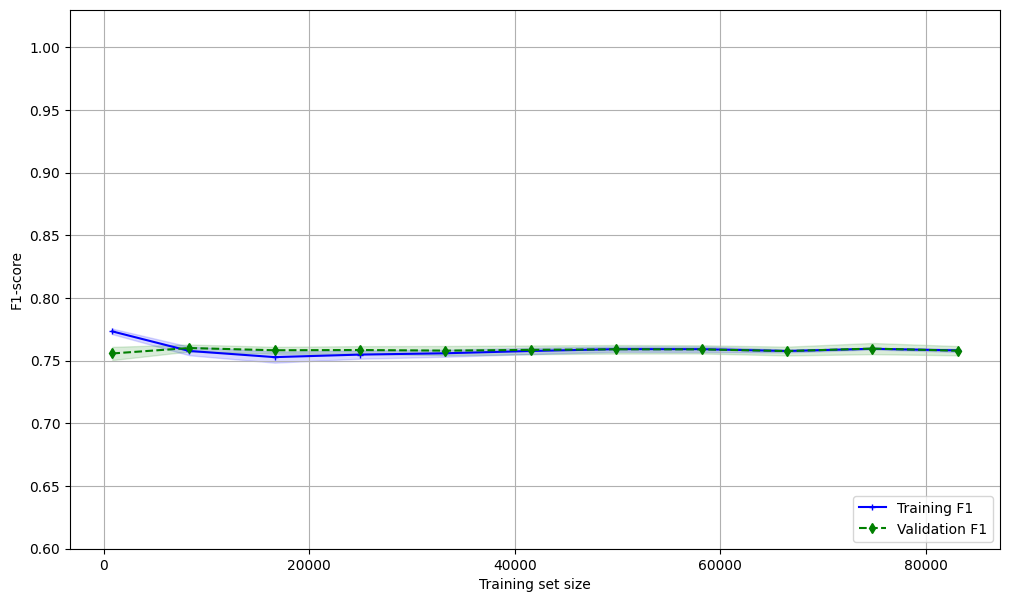

In [76]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training F1')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation F1')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

Here we see how the score changes with respect to changes in the hyperparameter C

In [77]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

(0.05, 100)

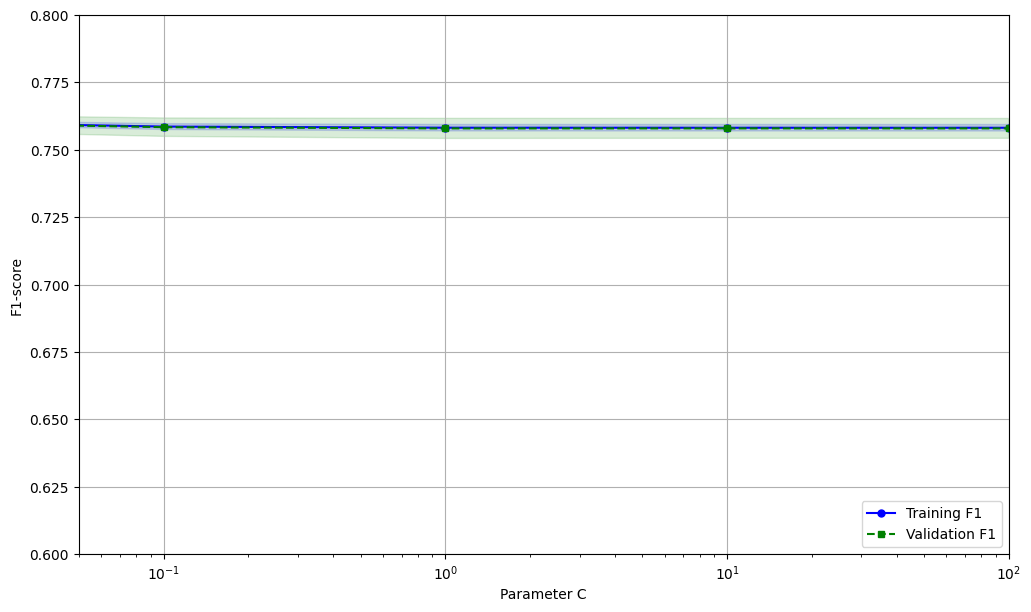

In [78]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training F1')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation F1')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 0.8])
ax.set_xscale('log')
ax.set_xlim([0.05,100])

# Clustering

In this final section I wanted to see if it was possible to apply clustering, because we analyzed it in class.

In [79]:
AIR_data = pd.read_csv('/work/airline_passenger_satisfaction.csv')
AIR_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [80]:
# replace missing values only for the column Arrival Delay
AIR_data['Arrival Delay'] = SimpleImputer(strategy='mean').fit_transform(AIR_data[['Arrival Delay']])

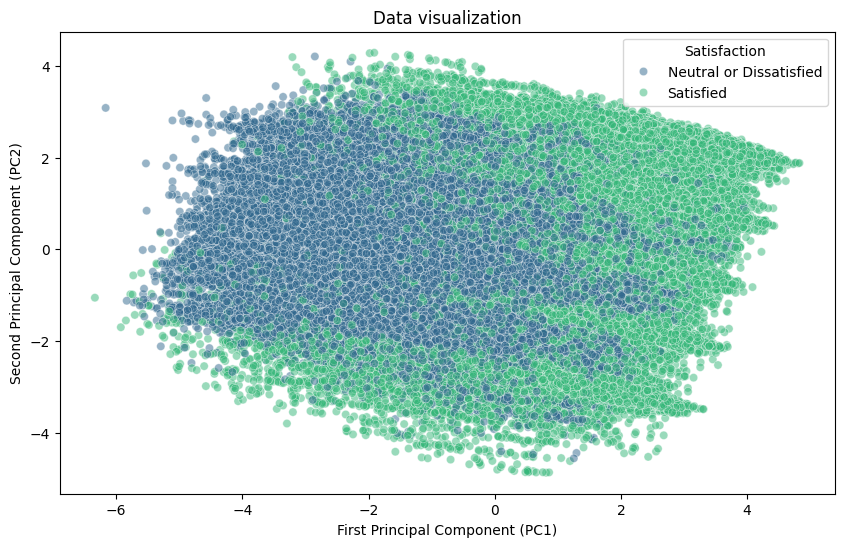

In [81]:
import seaborn as sns
# Select only the numerical columns
numerical_cols = AIR_data.select_dtypes(include=['int64', 'float64']).columns.drop(["ID"])

# Standardize data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(AIR_data[numerical_cols].dropna())

# Reduce the dataset to 2 components to see the possible binary classification
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# DataFrame of the results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Use label column for coloring the two classes
df_pca['Satisfaction'] = AIR_data['Satisfaction'].dropna().values

# Plot of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Satisfaction'], alpha=0.5, palette='viridis')
plt.title("Data visualization")
plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.legend(title="Satisfaction")
plt.show()

We can immediately see that the data are quite divided on the corners, but they overlap in the middle, suggesting that clustering is actually a method that will not bring us to improvements in the score

# Conclusions

At the end of the project we are able to conclude and understand several things:

 1) Subjective evaluations strongly enhance satisfaction prediction. In fact, the score obtained with the ratings of the customers was a lot higher than the one without them (0.96 against 0.76). This suggests that passengers determine their satisfaction primarily on their personal experience rather than just objective factors

2) Objective features are predictive, but less powerful. With only objective data such as age, travel type, flight class, delays, the model still achieves a decent F1-score (0.76).
This demonstrates that objective factors influence satisfaction but are not enough to fully explain it.

3) The relationship between input and output changes

With subjective features → The model captures complex, non-linear relationships (Random Forest performs better).
With only objective features → The relationship is simpler and more linear (Logistic Regression performs better).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abea236a-dccc-42ef-ac6e-528f6ecd2875' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>